In [2]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [8]:
!python ../../scripts/mimiccxr/extract_labels_from_reports_with_fact_embedding.py \
--integrated_fact_metadata_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_fact_metadata(578733,58628071).improved_comparison(6526297).jsonl" \
--integrated_sentence_facts_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_sentence_facts(58655550,49840052).jsonl" \
--background_findings_and_impression_per_report_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json" \
--paraphrases_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part1.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part2.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_anatomical_locations__part3.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__single-words.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words__part1.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_observations__two-or-more-words__part2.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words__part3.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_observations__two-or-more-words__part4.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-0613_paraphrased_observations__two-or-more-words_cluster-balanced.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words_cluster-balanced_1of5.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words_cluster-balanced_2of5.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words_cluster-balanced_3of5.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words_cluster-balanced_4of5.jsonl" \
--model_name "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/" \
--batch_size 400 \
--num_workers 3 \
--num_processes 10 \
--max_num_labels 5000 \
--num_kmeans_clusters__obs_sentences 200 \
--num_kmedoids_clusters__obs_sentences 4000 \
--num_kmeans_clusters__anatloc_sentences 50 \
--num_kmedoids_clusters__anatloc_sentences 300 \
--k_nearest_sentences 20

Loading paraphrases...
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part1.jsonl
len(paraphrases): 9891
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part2.jsonl
len(paraphrases): 9890
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_anatomical_locations__part3.jsonl
len(paraphrases): 8511
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__single-words.jsonl
len(paraphrases): 1864
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words__part1.jsonl
len(paraphrases): 14993
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_o

In [70]:
!python ../../scripts/mimiccxr/extract_labels_from_reports_with_fact_embedding.py \
--integrated_fact_metadata_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_fact_metadata(578733,58628071).improved_comparison(6526297).jsonl" \
--integrated_sentence_facts_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_sentence_facts(58655550,49840052).jsonl" \
--background_findings_and_impression_per_report_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json" \
--paraphrases_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part1.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part2.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_anatomical_locations__part3.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__single-words.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words__part1.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_observations__two-or-more-words__part2.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words__part3.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_observations__two-or-more-words__part4.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-0613_paraphrased_observations__two-or-more-words_cluster-balanced.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words_cluster-balanced_1of5.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words_cluster-balanced_2of5.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words_cluster-balanced_3of5.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words_cluster-balanced_4of5.jsonl" \
--model_name "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/" \
--batch_size 400 \
--num_workers 3 \
--num_processes 10 \
--max_num_labels 10000 \
--num_kmeans_clusters__obs_sentences 200 \
--num_kmedoids_clusters__obs_sentences 8000 \
--num_kmeans_clusters__anatloc_sentences 50 \
--num_kmedoids_clusters__anatloc_sentences 300 \
--k_nearest_sentences 20

Loading paraphrases...
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part1.jsonl
len(paraphrases): 9891
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part2.jsonl
len(paraphrases): 9890
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_anatomical_locations__part3.jsonl
len(paraphrases): 8511
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__single-words.jsonl
len(paraphrases): 1864
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words__part1.jsonl
len(paraphrases): 14993
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_o

Clustering 8904 sentences with KMedoids (n_clusters=35, metric='cosine', method=alternate, max_iter=300)
Clustering 10702 sentences with KMedoids (n_clusters=43, metric='cosine', method=alternate, max_iter=300)
Clustering 7742 sentences with KMedoids (n_clusters=31, metric='cosine', method=alternate, max_iter=300)
Clustering 10226 sentences with KMedoids (n_clusters=41, metric='cosine', method=alternate, max_iter=300)
Clustering 13782 sentences with KMedoids (n_clusters=55, metric='cosine', method=alternate, max_iter=300)
Clustering 9526 sentences with KMedoids (n_clusters=38, metric='cosine', method=alternate, max_iter=300)
Clustering 15188 sentences with KMedoids (n_clusters=60, metric='cosine', method=alternate, max_iter=300)
Clustering 8570 sentences with KMedoids (n_clusters=34, metric='cosine', method=alternate, max_iter=300)
Clustering 8613 sentences with KMedoids (n_clusters=34, metric='cosine', method=alternate, max_iter=300)
Clustering 8170 sentences with KMedoids (n_clusters

Clustering 6329 sentences with KMedoids (n_clusters=25, metric='cosine', method=alternate, max_iter=300)
Clustering 10762 sentences with KMedoids (n_clusters=43, metric='cosine', method=alternate, max_iter=300)
Clustering 12746 sentences with KMedoids (n_clusters=51, metric='cosine', method=alternate, max_iter=300)
Clustering 9222 sentences with KMedoids (n_clusters=37, metric='cosine', method=alternate, max_iter=300)
Clustering 10905 sentences with KMedoids (n_clusters=43, metric='cosine', method=alternate, max_iter=300)
Clustering 11334 sentences with KMedoids (n_clusters=45, metric='cosine', method=alternate, max_iter=300)
Clustering 3320 sentences with KMedoids (n_clusters=14, metric='cosine', method=alternate, max_iter=300)
Clustering 11617 sentences with KMedoids (n_clusters=46, metric='cosine', method=alternate, max_iter=300)
Clustering 10817 sentences with KMedoids (n_clusters=43, metric='cosine', method=alternate, max_iter=300)
/home/pamessina/venv2/lib/python3.10/site-package

Clustering 13945 sentences with KMedoids (n_clusters=55, metric='cosine', method=alternate, max_iter=300)
Clustering 6545 sentences with KMedoids (n_clusters=26, metric='cosine', method=alternate, max_iter=300)
Clustering 11159 sentences with KMedoids (n_clusters=44, metric='cosine', method=alternate, max_iter=300)
Clustering 6330 sentences with KMedoids (n_clusters=25, metric='cosine', method=alternate, max_iter=300)
/home/pamessina/venv2/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 21 is empty! self.labels_[self.medoid_indices_[21]] may not be labeled with its corresponding cluster (21).
  warnings.warn(
Clustering 5649 sentences with KMedoids (n_clusters=23, metric='cosine', method=alternate, max_iter=300)
Clustering 7717 sentences with KMedoids (n_clusters=31, metric='cosine', method=alternate, max_iter=300)
Clustering 16077 sentences with KMedoids (n_clusters=64, metric='cosine', method=alternate, max_iter=300)
Clustering 9072 sentence

Done!


In [63]:
from medvqa.utils.files import load_pickle, load_jsonl, load_json
import numpy as np
import random

### Inspecting sentece embeddings

In [25]:
sentence_embeddings = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/sentence_embeddings(hash=447,3362090641338804643).pkl')

In [26]:
sentence_embeddings.keys()

dict_keys(['sentences', 'embeddings'])

In [27]:
assert len(sentence_embeddings['sentences']) == len(sentence_embeddings['embeddings'])

In [28]:
print(len(sentence_embeddings['sentences']))
print(sentence_embeddings['embeddings'].shape)

2297179
(2297179, 128)


In [119]:
embeddings = sentence_embeddings['embeddings']
sentences = sentence_embeddings['sentences']
# i = random.randint(0, embeddings.shape[0]-1)
# i = sentences.index('focal widening')
# i = sentences.index('There is a notable enlargement of the spleen')
# i = sentences.index('removal of a central venous line')
# i = sentences.index('intact mediastinal wires')
# i = sentences.index('cephalization suggesting fluid overload')
# i = sentences.index('no atelectasis')
i = sentences.index('heart')
idxs = np.argsort(np.dot(embeddings[i], embeddings.T))[::-1]
print('Query:', sentences[i])
print('--------')
for idx in idxs[:30]:
    print(sentences[idx])

Query: heart
--------
heart
heart ventricles
cardiac
cardiac ventricles
myocardium
heart function
cardiac function
cardiac murmur
cardiac chambers
cardiac figures
globate heart
heart parts
heart shadows
heart form
cardiac contours
first heart
cardiac organs
heart chambers
cardiac structures
cardiac form
heart cavity
heart segment
formation of the heart
cardiac shadows
cardiac cavity
cardiac organ
heart organs
cardiac anatomy
heart chamber
heart covering


### Inspecting observation clusters

In [11]:
!ls -lh "/home/pamessina/medvqa-workspace/cache/mimiccxr/kmeans_clustering_obs_sentences(hash=263,2675795008307732991).pkl"

-rw-rw-r-- 1 pamessina pamessina 18M Aug 27 12:39 '/home/pamessina/medvqa-workspace/cache/mimiccxr/kmeans_clustering_obs_sentences(hash=263,2675795008307732991).pkl'


In [12]:
kmeans_obs_clustering = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/kmeans_clustering_obs_sentences(hash=263,2675795008307732991).pkl')

In [13]:
kmeans_obs_clustering.keys()

dict_keys(['sentence_idxs', 'labels', 'cluster_centers'])

In [14]:
label2idxs = dict()
for l,i in zip(kmeans_obs_clustering['labels'], kmeans_obs_clustering['sentence_idxs']):
    try:
        label2idxs[l].append(i)
    except KeyError:
        label2idxs[l] = [i]

In [15]:
len(label2idxs)

100

In [18]:
c = random.randint(0, len(label2idxs)-1)
idxs = label2idxs[c]
print('c =', c)
print('len(idxs) =',  len(idxs))
print()
for i in random.sample(idxs, 20):
    print(sentences[i])

c = 22
len(idxs) = 33639

expansion loss at the lower parts
small atelectasis at the bases of the left lung
Compressive atelectasis is observed at the base of the left lung
The base of the left lung exhibits a mild atelectasis
pre-existing spot of plate-like pulmonary collapse
presumably some atelectasis
The underlying lung shows significant atelectasis
adjacent left lung base atelectasis
The basilar region of the lungs exhibits marked atelectasis
Both lung bases exhibit aggravated atelectasis
atelectasis at the right lung base medially
An opacity in the left basilar region is indicative of atelectasis
atelectasis cleared by worsened on
Partial lung collapse noted on the left
basal infiltrate and partial collapse of the right lung
partial atelectatic collapse
The right lower lobe atelectasis is more visible
New mild airway collapse at the lower parts of both lungs
Retrocardiac area of the lungs exhibits slight atelectasis
relatively extensive atelectasis


In [19]:
kmedoids_obs_clustering = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_clustering_anatloc_sentences(hash=347,3302427387281192803).pkl')

In [20]:
kmedoids_obs_clustering.keys()

dict_keys(['subclusters'])

In [21]:
kmedoids_obs_clustering['subclusters'][0].keys()

dict_keys(['sentence_idxs', 'labels', 'cluster_centers'])

In [22]:
label2idxs_2 = dict()
offset = 0
for sc in kmedoids_obs_clustering['subclusters']:
    for l,i in zip(sc['labels'], sc['sentence_idxs']):
        try:
            label2idxs_2[l + offset].append(i)
        except KeyError:
            label2idxs_2[l + offset] = [i]
    offset += len(set(sc['labels']))

In [129]:
# c = random.randint(0, len(label2idxs_2)-1)
c = 39
idxs = label2idxs_2[c]
print('c =', c)
print('len(idxs) =',  len(idxs))
print()
for i in random.sample(idxs, 20):
    print(sentences[i])

c = 39
len(idxs) = 469

right T9 rib transverse joint
right lateral region of the eleventh thoracic vertebra
right paramedian at the level of T12
right lumbar region of the back
right side of the thoracic spine in the lower area
right T12
right of the mid-thoracic vertebral region
right lateral to T9
right side of the T12/L1 vertebral level
posterior connection points of the right upper ribs and the vertebrae
right margin of the T12/L1 disc space
right anterolateral thoracic spine
right mid thoracic spine
right thoracic spine
right mid thoracic spinal column
right side of the body at the T12 level
right side of a lower thoracic spinal segment
right ventrolateral area of the T5 vertebra
right lateral margin of the T12/L1 disc space
right of the midline at the twelfth thoracic vertebra


### Inspecting anatomical location clusters

In [24]:
!ls -lh "/home/pamessina/medvqa-workspace/cache/mimiccxr/kmeans_clustering_anatloc_sentences(hash=265,648587225485942165).pkl"

-rw-rw-r-- 1 pamessina pamessina 2.6M Aug 27 13:12 '/home/pamessina/medvqa-workspace/cache/mimiccxr/kmeans_clustering_anatloc_sentences(hash=265,648587225485942165).pkl'


In [25]:
kmeans_anatloc_clustering = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/kmeans_clustering_anatloc_sentences(hash=265,648587225485942165).pkl')

In [26]:
kmeans_anatloc_clustering.keys()

dict_keys(['sentence_idxs', 'labels', 'cluster_centers'])

In [27]:
label2idxs_3 = dict()
for l,i in zip(kmeans_anatloc_clustering['labels'], kmeans_anatloc_clustering['sentence_idxs']):
    try:
        label2idxs_3[l].append(i)
    except KeyError:
        label2idxs_3[l] = [i]

In [28]:
len(label2idxs_3)

50

In [29]:
c = random.randint(0, len(label2idxs_3)-1)
idxs = label2idxs_3[c]
print('c =', c)
print('len(idxs) =',  len(idxs))
print()
for i in random.sample(idxs, 20):
    print(sentences[i])

c = 7
len(idxs) = 12225

upper segment of lumbar spinal implants
superior endplate of the first lumbar vertebra
vertebral bodies in the neck
transverse process at the level of the seventh neck vertebral body
angle at the back and bottom of a mid thoracic vertebra
rib-spine interface
neck spine in the posterior position
thoracic area of the vertebral column
thoracic and lumbar junction between T9 and L2
upper margins of the thoracic vertebral bodies
lowermost lumbar vertebra
situated posterior to the assumed L2 vertebral body
cervical level of the spine
rib vertebral junction
to the right of the T3 vertebra
vertebral segment
T3 level
superior to the first thoracic vertebra
thoracic spine above T6
disc in the spine


In [30]:
kmedoids_anatloc_clustering = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_clustering_anatloc_sentences(hash=347,3302427387281192803).pkl')

In [31]:
label2idxs_4 = dict()
offset = 0
for sc in kmedoids_anatloc_clustering['subclusters']:
    for l,i in zip(sc['labels'], sc['sentence_idxs']):
        try:
            label2idxs_4[l + offset].append(i)
        except KeyError:
            label2idxs_4[l + offset] = [i]
    offset += len(set(sc['labels']))

In [36]:
c = random.randint(0, len(label2idxs_4)-1)
idxs = label2idxs_4[c]
print('c =', c)
print('len(idxs) =',  len(idxs))
print()
for i in random.sample(idxs, 20):
    print(sentences[i])

c = 259
len(idxs) = 867

left perihilum region
left perihilar region of the lung parenchyma
left perihilar and lower pulmonary
peri-hilar region in the left mid lung
perihilar region of the left lung
left perihilar bronchovascular infiltrates
left peri-hilum pulmonary lobes
peribronchial region of the left lung
left perihilum area
peri-hilar area of the left mid lobe
left perihilar lung segment
left superhilar region
vicinity of the pulmonary hilum in the left mid zone
left peri- and sub-hilar regions
left lung base in the subhilum zone
left lower perihilar zone
left perihilar areas
left perihilar pulmonary parenchyma
left perihilar lung territory
left mediastinal area above the pulmonary hilum


### Inspecting closest cluster center to each sentence

In [71]:
ccc_obs = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/closest_cluster_centers_(obs_sentences,obs_clusters)(hash=350,4188584469648537280).pkl')

In [72]:
ccc_obs.keys()

dict_keys(['sentence_idxs', 'closest_cluster_centers'])

In [73]:
kmros = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_obs_sentences(hash=488,1416617623155579779).pkl')

In [74]:
kmros.keys()

dict_keys(['refined_cluster_centers', 'refined_cluster_center_sentence_idxs', 'refined_cluster_center_sentences'])

In [75]:
len(kmros['refined_cluster_center_sentences'])

7697

In [89]:
i = random.randint(0, len(ccc_obs['sentence_idxs'])-1)
print(sentences[ccc_obs['sentence_idxs'][i]])
print()
print(kmros['refined_cluster_center_sentences'][ccc_obs['closest_cluster_centers'][i]])

previously identified pleural effusions are no longer visible

The pleural effusion that was seen before has resolved


In [90]:
ccc2idxs = dict()
for i, c in zip(ccc_obs['sentence_idxs'], ccc_obs['closest_cluster_centers']):
    try:
        ccc2idxs[c].append(i)
    except KeyError:
        ccc2idxs[c] = [i]

In [113]:
idxs = ccc2idxs[1000]
print('len(idxs) =',  len(idxs))
print()
for i in random.sample(idxs, 20):
    print(sentences[i])

len(idxs) = 113

recently found areas of increased radiodensity in the lung
new bilateral widespread opacification
new bilateral areas of ground glass opacities
new diffuse lung opacities
recently developed areas of opacity in the lungs
new bibasilar opacifications on the left
newly formed patchy ground-glass opacity in the lungs
new diffuse bilateral opacities
bilateral small lung opacities seen on CT today
new bibasilar opacities on the left
Newly formed lung opacities
record of multiple ground-glass opacities
recent bilateral ground glass opacities
recently observed pulmonary ground glass opacities
new diffuse ground glass opacities throughout both lungs
Fresh pulmonary opacities
new basal vascular congestion on the left
recent lung infiltrate
bilateral new opacities
new patchy opacities


In [168]:
assert any('mild pectus deformity' == sentences[i] for i in idxs)

In [68]:
ccc_anatloc = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/closest_cluster_centers_(anatloc_sentences,anatloc_clusters)(hash=360,736789472007516774).pkl')

In [69]:
ccc_anatloc.keys()

dict_keys(['sentence_idxs', 'closest_cluster_centers'])

In [70]:
kmrals = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_anatloc_sentences(hash=489,971968635628419461).pkl')

In [81]:
i = random.randint(0, len(ccc_anatloc['sentence_idxs'])-1)
print(sentences[ccc_anatloc['sentence_idxs'][i]])
print()
print(kmrals['refined_cluster_center_sentences'][ccc_anatloc['closest_cluster_centers'][i]])

soft tissues of the lower right neck

structures in the right side of the neck


### Inspecting mapping of facts to labels

In [147]:
!ls -lh "/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_fact(hash=604,123081148436822053).pkl"

-rw-rw-r-- 1 pamessina pamessina 55M Aug 27 16:42 '/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_fact(hash=604,123081148436822053).pkl'


In [148]:
cblpf = load_pickle("/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_fact(hash=604,123081148436822053).pkl")

In [149]:
cblpf.keys()

dict_keys(['fact2labels', 'obs_al2fact'])

In [150]:
len(cblpf['fact2labels']), len(cblpf['obs_al2fact'])

(578715, 29543)

In [151]:
facts = list(cblpf['fact2labels'].keys())

In [152]:
# f = facts[0]
# f = random.choice(facts)
f = 'mild pectus deformity'
labels = cblpf['fact2labels'][f]

print(f)
print()

if 'fact_ccid' in labels:
    print(kmros['refined_cluster_center_sentences'][labels['fact_ccid']])
if 'detailed_obs_ccid' in labels:
    print(kmros['refined_cluster_center_sentences'][labels['detailed_obs_ccid']])
if 'short_obs_ccid' in labels:
    print(kmros['refined_cluster_center_sentences'][labels['short_obs_ccid']])
if 'anatloc_ccid' in labels:
    print(kmrals['refined_cluster_center_sentences'][labels['anatloc_ccid']])
if 'fact_ccid' in labels and 'anatloc_ccid' in labels:
    print(cblpf['obs_al2fact'][(labels['fact_ccid'], labels['anatloc_ccid'])])

mild pectus deformity

lower low volumes
lower low volumes
lower low volumes


### Inspecting mapping of reports to labels

In [172]:
!ls -lh "/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_report(hash=550,2115706512139644026).pkl"

-rw-rw-r-- 1 pamessina pamessina 57M Aug 27 17:42 '/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_report(hash=550,2115706512139644026).pkl'


In [173]:
cblpr = load_pickle("/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_report(hash=550,2115706512139644026).pkl")

In [174]:
cblpr.keys()

dict_keys(['top_label_names', 'top_label_ids', 'top_label_counts', 'labeled_reports'])

In [175]:
len(cblpr['top_label_names'])

5000

In [176]:
cblpr['top_label_counts'][-10:]

[25, 25, 25, 25, 25, 25, 25, 25, 25, 25]

In [177]:
label_id_2_name = {x:y for x, y in zip(cblpr['top_label_ids'], cblpr['top_label_names'])}

In [184]:
i = 3
# i = random.randint(0, len(cblpr['labeled_reports'])-1)
with open(cblpr['labeled_reports'][i]['report_path']) as f:
    print(f.read())
print()
for label in cblpr['labeled_reports'][i]['labels']:
    print(label_id_2_name[label])

                                 FINAL REPORT
 EXAMINATION:  CHEST (PA AND LAT)
 
 INDICATION:  History: ___M with sepsis
 
 TECHNIQUE:  Chest PA and lateral
 
 COMPARISON:  None.
 
 FINDINGS: 
 
 Lung volumes are low.  This accentuates the size of the cardiac silhouette
 which is borderline enlarged.  Mediastinal and hilar contours are normal. 
 Pulmonary vasculature is normal.  Lungs are clear.  No pleural effusion or
 pneumothorax is present.  No acute osseous abnormality is visualized.
 
 IMPRESSION: 
 
 Low lung volumes.  No acute cardiopulmonary process.


normal hilar silhouette
normal hilar size
normal lung
normal hilar
mediastinal contours normal
The size of the heart silhouette is slightly increased compared to previous
No pneumothorax seen
small heart size
moderate size of the cardiac silhouette
no abnormality in the lungs
no cardiopulmonary process
lungs in low lung volume
bony structures unremarkable
no over pleural effusion
lung volumes
decreased cardiac silhouette enlarg

In [112]:
tmp = load_jsonl('/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_sentence_facts(58655550,49840052).jsonl')

In [114]:
for x in tmp:
    if x['sentence'] == 'There is a mild pectus deformity.':
        print(x)
        break

{'sentence': 'There is a mild pectus deformity.', 'facts': ['mild pectus deformity'], 'extraction_method': 't5-small-finetuned'}


In [162]:
cblpf['fact2labels']['mild pectus deformity']

{'fact_ccid': 26, 'short_obs_ccid': 26, 'detailed_obs_ccid': 26}

In [163]:
label_id_2_name[26]

'focal widening'

In [118]:
len(cblpf['fact2labels'])

578715

In [122]:
reports = load_json("/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json")

In [124]:
reports[1]

{'background': 'indication: Chest pain.',
 'findings': 'There is a mild pectus deformity. The heart size is normal. The hilar and mediastinal contours are within normal limits. There is no pneumothorax, focal consolidation, or pleural effusion.',
 'impression': 'No acute intrathoracic process.',
 'path': '/mnt/data/mimic-cxr/files/p10/p10703179/s55231872.txt'}

### Visualize Clustering of Fact Embedding

In [1]:
from medvqa.evaluation.plots import plot_embeddings_and_clusters
from medvqa.utils.files import get_cached_pickle_file

In [2]:
sentence_embeddings = get_cached_pickle_file('/home/pamessina/medvqa-workspace/cache/mimiccxr/sentence_embeddings(hash=447,3362090641338804643).pkl')

In [3]:
ccc_obs = get_cached_pickle_file("/home/pamessina/medvqa-workspace/cache/mimiccxr/closest_cluster_centers_(obs_sentences,obs_clusters)(hash=350,4188584469648537280).pkl")

In [4]:
ccc_obs.keys()

dict_keys(['sentence_idxs', 'closest_cluster_centers'])

In [28]:
max(ccc_obs['closest_cluster_centers'])

7696

In [5]:
kmros = get_cached_pickle_file("/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_obs_sentences(hash=488,1416617623155579779).pkl")

In [6]:
kmros.keys()

dict_keys(['refined_cluster_centers', 'refined_cluster_center_sentence_idxs', 'refined_cluster_center_sentences'])

In [7]:
kmros['refined_cluster_centers'].shape

(7697, 128)

In [30]:
from importlib import reload
import medvqa

In [75]:
reload(medvqa.evaluation.plots)

<module 'medvqa.evaluation.plots' from '/home/pamessina/medvqa/medvqa/evaluation/plots.py'>

In [76]:
from medvqa.evaluation.plots import SentenceClusteringVisualizer

In [77]:
scv = SentenceClusteringVisualizer(
    sentence_embeddings_filepath='/home/pamessina/medvqa-workspace/cache/mimiccxr/sentence_embeddings(hash=447,3362090641338804643).pkl',
    closest_cluster_centers_filepath='/home/pamessina/medvqa-workspace/cache/mimiccxr/closest_cluster_centers_(obs_sentences,obs_clusters)(hash=350,4188584469648537280).pkl',
    kmedoids_refinement_filepath='/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_obs_sentences(hash=488,1416617623155579779).pkl',
    sample_size=400000,
)

Randomly selecting 400000 samples from dataset
Fitting PCA to reduce dimensionality to 50
self.pca_embeddings.shape = (2297179, 50)
Fitting UMAP to reduce dimensionality to 2
embeddings.shape = (410026, 50)
UMAP(angular_rp_forest=True, metric='cosine', verbose=1)
Wed Sep  6 08:14:32 2023 Construct fuzzy simplicial set
Wed Sep  6 08:14:32 2023 Finding Nearest Neighbors
Wed Sep  6 08:14:32 2023 Building RP forest with 37 trees
Wed Sep  6 08:14:35 2023 NN descent for 19 iterations
	 1  /  19
	 2  /  19
	 3  /  19
	Stopping threshold met -- exiting after 3 iterations
Wed Sep  6 08:14:59 2023 Finished Nearest Neighbor Search
Wed Sep  6 08:15:05 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Wed Sep  6 08:22:20 2023 Finished embedding
self.umap_embeddings.shape = (410026, 2)
cluster_centers.shape = (7697, 128)
self.pca_cluster_centers.shape = (7697, 50)
Wed Sep  6 08:22:54 2023 Worst tree score: 0.73327301
Wed Sep  6 08:22:54 2023 Mean tree score: 0.73726458
Wed Sep  6 08:22:54 2023 Best tree score: 0.74159444
Wed Sep  6 08:22:56 2023 Forward diversification reduced edges from 6150390 to 1918592
Wed Sep  6 08:22:56 2023 Reverse diversification reduced edges from 1918592 to 1918592
Wed Sep  6 08:22:57 2023 Degree pruning reduced edges from 1946748 to 1946748
Wed Sep  6 08:22:57 2023 Resorting data and graph based on tree order
Wed Sep  6 08:22:57 2023 Building and compiling search function


Epochs completed:   0%|            0/100 [00:00]

self.umap_cluster_centers.shape = (7697, 2)


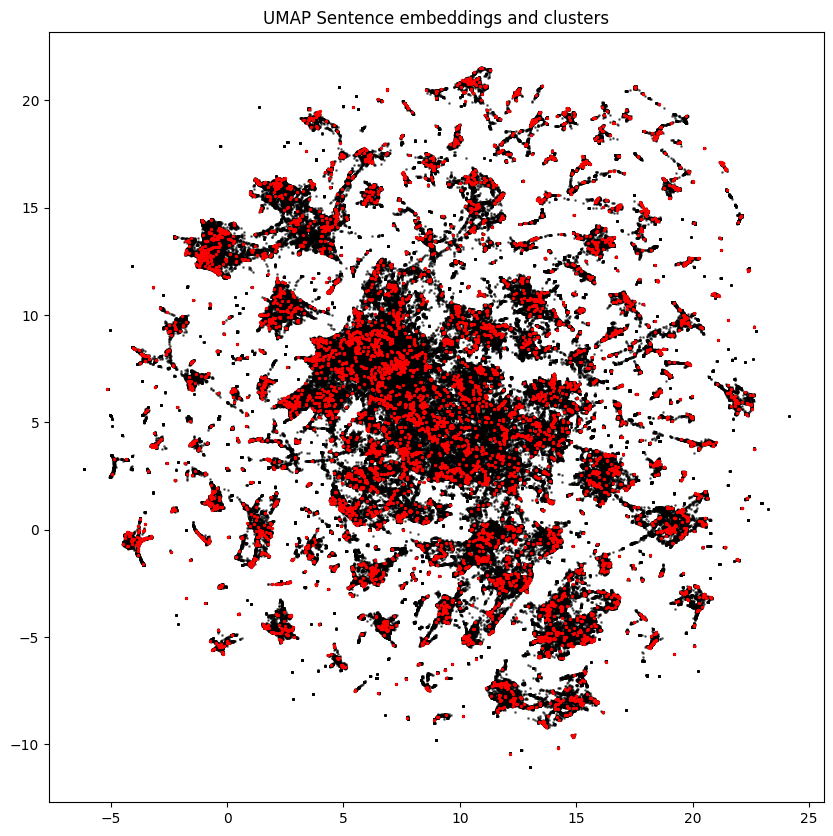

In [78]:
scv.plot_embeddings_and_clusters()

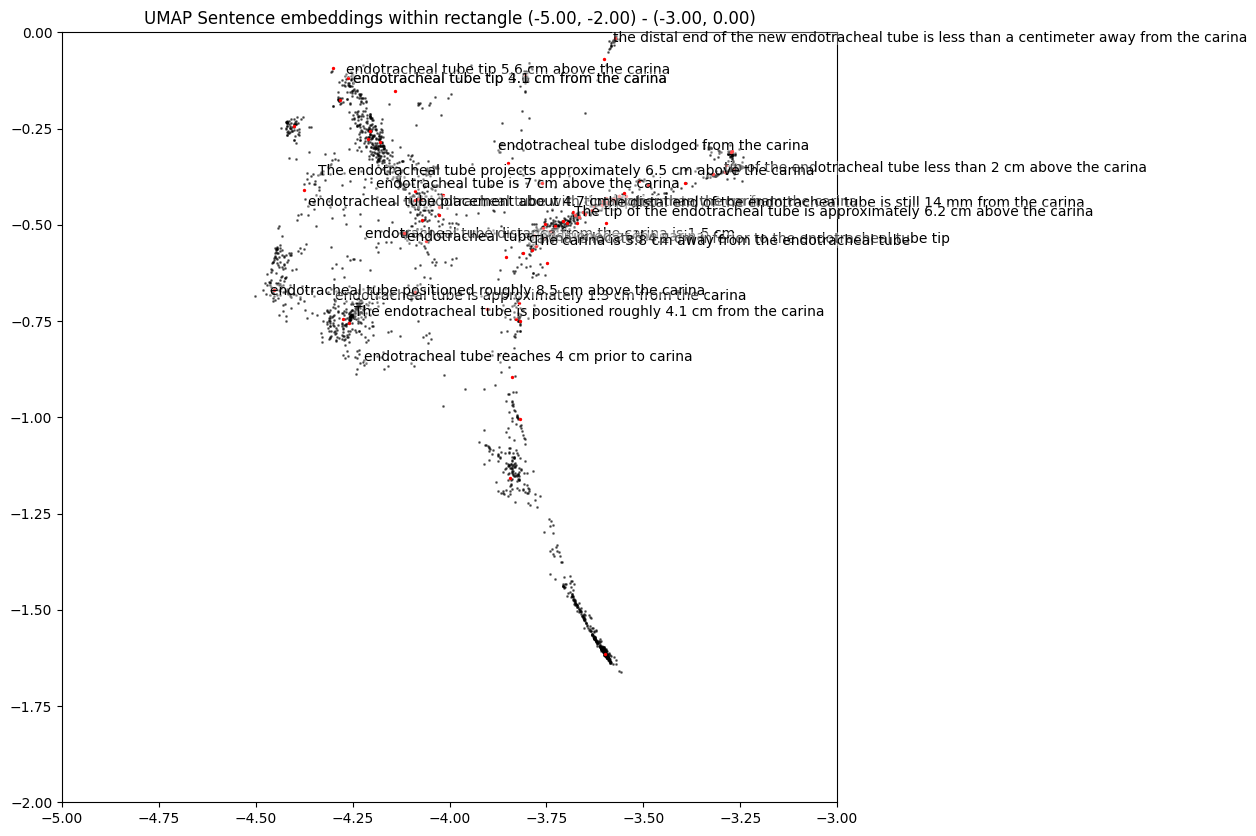

endotracheal tube is 7 cm above the carina
endotracheal tube positioned at the carina
endotracheal tube dislodged from the carina
endotracheal tube tip 3.6 cm from the carina
endotracheal tube tip 4.1 cm from the carina
endotracheal tube tip 5.6 cm above the carina
endotracheal tube reaches 4 cm prior to carina
The carina is 3.8 cm away from the endotracheal tube
endotracheal tube distance from the carina is 1.5 cm
endotracheal tube is approximately 1.3 cm from the carina
endotracheal tube positioned roughly 8.5 cm above the carina
tip of the endotracheal tube less than 2 cm above the carina
endotracheal tube with tip approximately 6 cm from the carina
carina is located 4.2 cm inferior to the endotracheal tube tip
endotracheal tube placement about 4.7 cm higher than the carina
The endotracheal tube is positioned roughly 4.1 cm from the carina
The endotracheal tube projects approximately 6.5 cm above the carina
the distal end of the endotracheal tube is still 14 mm from the carina
The t

In [81]:
scv.plot_embeddings_and_clusters_within_rectangle(-5,-2,2,2)

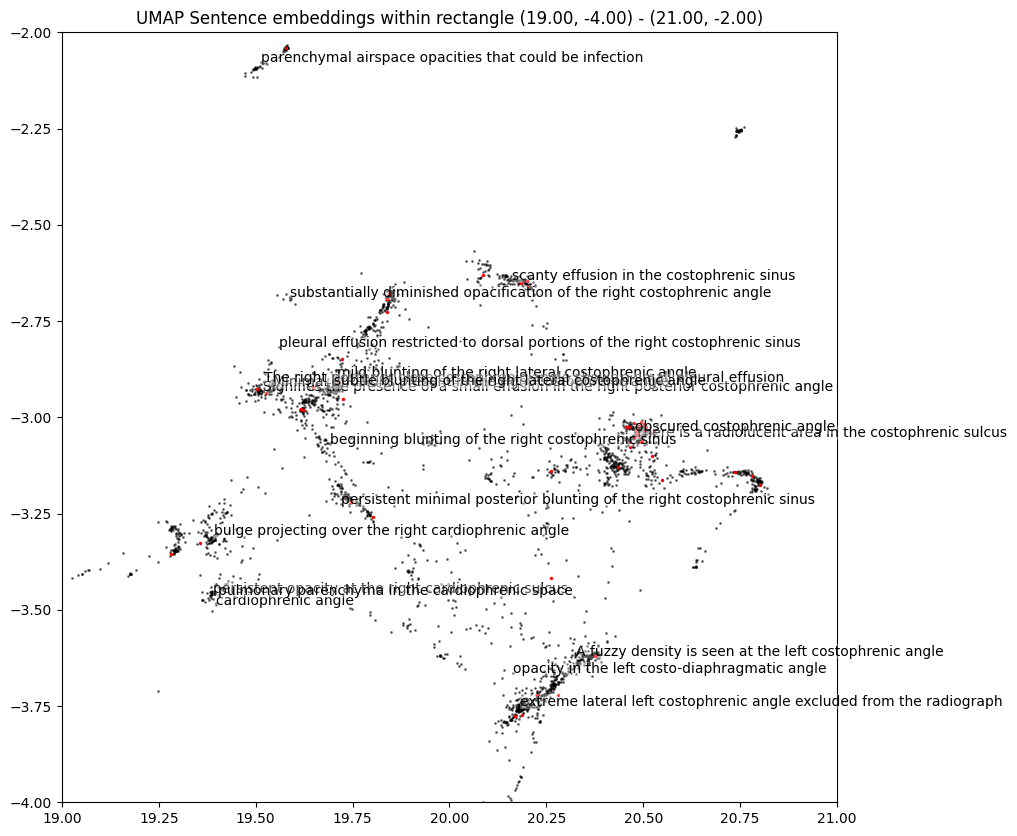

cardiophrenic angle
obscured costophrenic angle
scanty effusion in the costophrenic sinus
opacity in the left costo-diaphragmatic angle
pulmonary parenchyma in the cardiophrenic space
beginning blunting of the right costophrenic sinus
bulge projecting over the right cardiophrenic angle
persistent opacity at the right cardiophrenic sulcus
mild blunting of the right lateral costophrenic angle
A fuzzy density is seen at the left costophrenic angle
There is a radiolucent area in the costophrenic sulcus
parenchymal airspace opacities that could be infection
subtle blunting of the right lateral costophrenic angle
Minimal effusions present in the right costophrenic angle
extreme lateral left costophrenic angle excluded from the radiograph
persistent minimal posterior blunting of the right costophrenic sinus
substantially diminished opacification of the right costophrenic angle
The right posterior close costophrenic angle shows a small pleural effusion
pleural effusion restricted to dorsal por

In [86]:
scv.plot_embeddings_and_clusters_within_rectangle(19,-4,2,2)

Epochs completed:   0%|            0/100 [00:00]

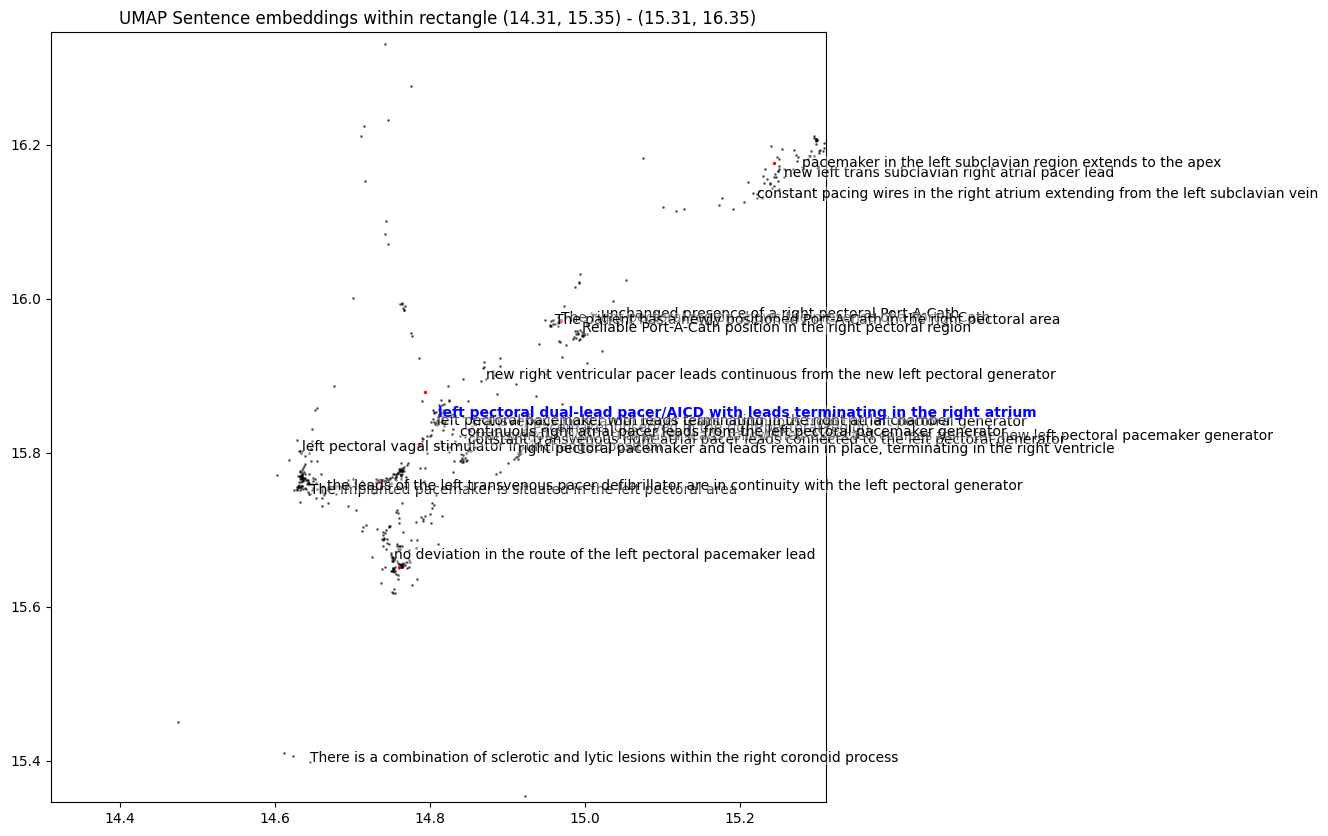

left pectoral dual-lead pacer/AICD with leads terminating in the right atrium
Pacemaker observed in the right pectoral region
new left trans subclavian right atrial pacer lead
unchanged presence of a right pectoral Port-A-Cath
left pectoral vagal stimulator in unchanged position
Reliable Port-A-Cath position in the right pectoral region
pacemaker in the left subclavian region extends to the apex
The implanted pacemaker is situated in the left pectoral area
The right pectoral region shows the presence of a Port-A-Cath
no deviation in the route of the left pectoral pacemaker lead
The patient has a newly positioned Port-A-Cath in the right pectoral area
left pectoral pacemaker with leads terminating in the right atrial chamber
continuous right atrial pacer leads from the left pectoral pacemaker generator
transvenous right atrial pacer leads continuous from the left pectoral generator
constant pacing wires in the right atrium extending from the left subclavian vein
new right ventricular pa

In [87]:
scv.plot_rectangle_around_sentence('left pectoral dual-lead pacer/AICD with leads terminating in the right atrium', 1, 1)

Epochs completed:   0%|            0/100 [00:00]

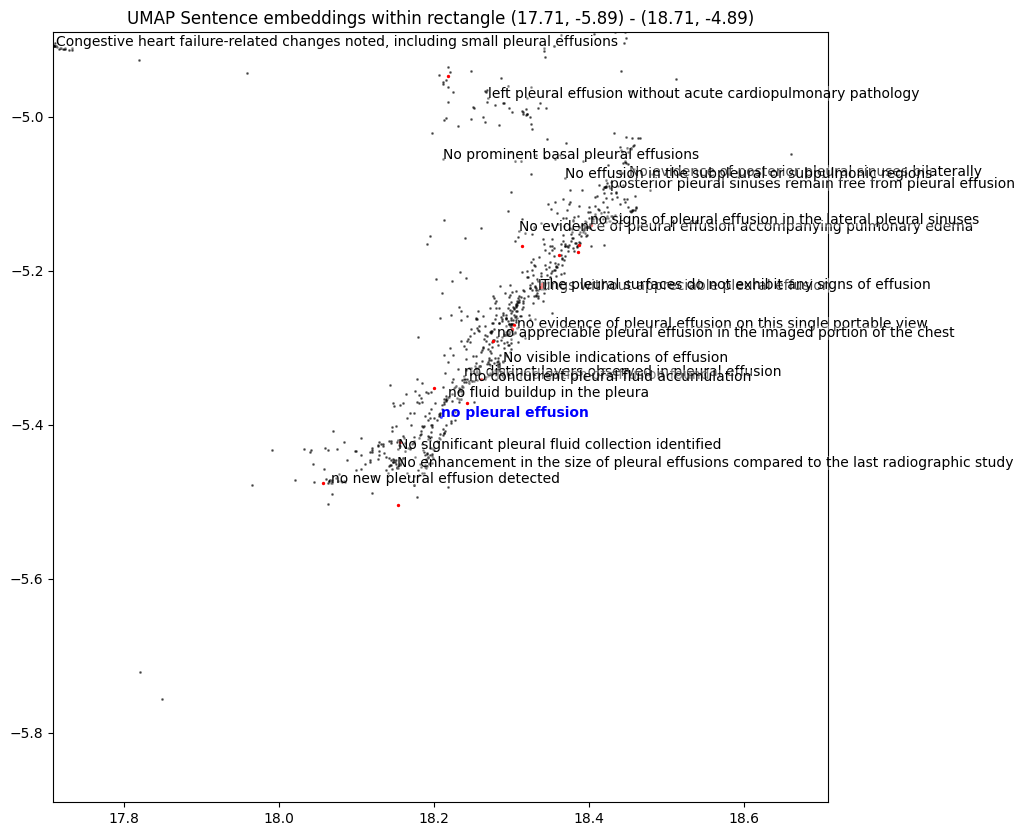

no pleural effusion
no fluid buildup in the pleura
No indication of effusion found
no new pleural effusion detected
No visible indications of effusion
No prominent basal pleural effusions
no concurrent pleural fluid accumulation
lungs without appreciable pleural effusion
no distinct layers observed in pleural effusion
No significant pleural fluid collection identified
No effusion in the subpleural or subpulmonic regions
No evidence of posterior pleural sinuses bilaterally
The pleural surfaces do not exhibit any signs of effusion
no signs of pleural effusion in the lateral pleural sinuses
posterior pleural sinuses remain free from pleural effusion
No evidence of pleural effusion accompanying pulmonary edema
no evidence of pleural effusion on this single portable view
left pleural effusion without acute cardiopulmonary pathology
no appreciable pleural effusion in the imaged portion of the chest
Congestive heart failure-related changes noted, including small pleural effusions
No enhanceme

In [80]:
scv.plot_rectangle_around_sentence('no pleural effusion', 1, 1)

Epochs completed:   0%|            0/100 [00:00]

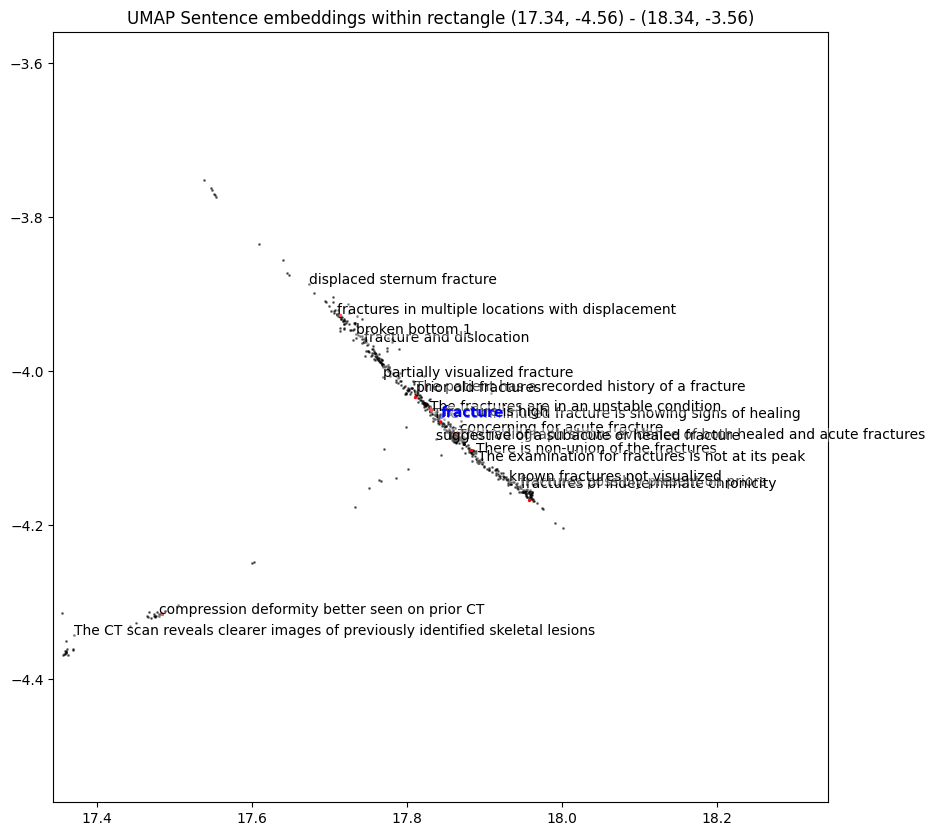

fracture
broken bottom 1
fracture is high
prior old fractures
fracture and dislocation
displaced sternum fracture
concerning for acute fracture
partially visualized fracture
known fractures not visualized
There is non-union of the fractures
fractures possibly present on priors
fractures of indeterminate chronicity
The fractures are in an unstable condition
suggestive of a subacute or healed fracture
compression deformity better seen on prior CT
The examination for fractures is not at its peak
The patient has a recorded history of a fracture
fractures in multiple locations with displacement
The comminuted fracture is showing signs of healing
The radiograph shows evidence of both healed and acute fractures
The CT scan reveals clearer images of previously identified skeletal lesions


In [82]:
scv.plot_rectangle_around_sentence('fracture', 1, 1)

Epochs completed:   0%|            0/100 [00:00]

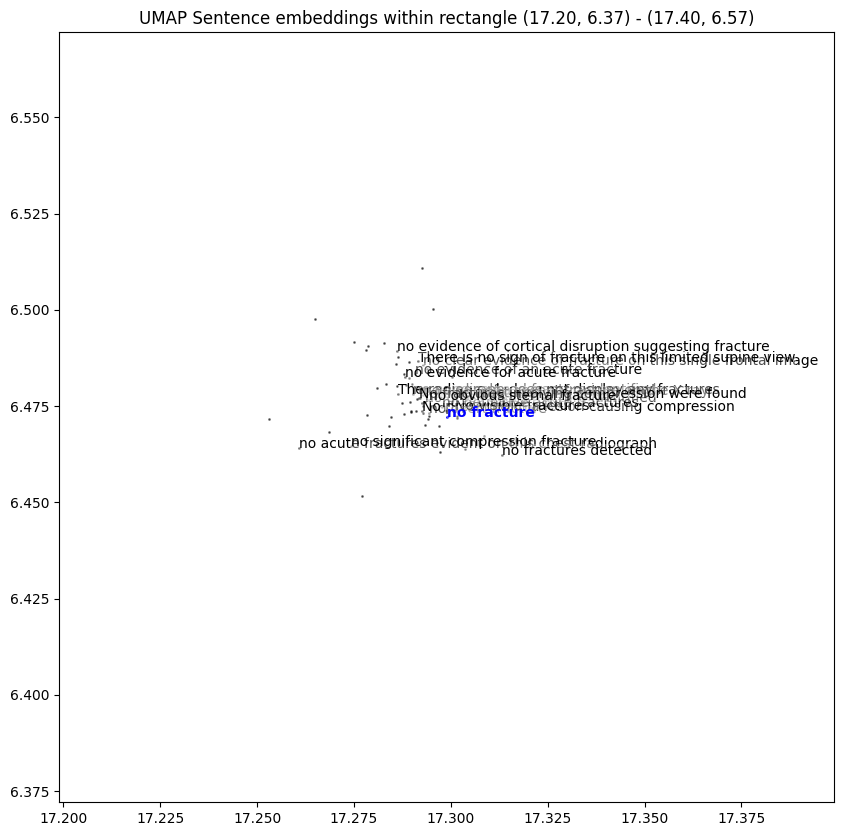

no fracture
no fractures
no overt fracture
no fracture visible
No visible fractures
no fractures detected
no obvious sternal fracture
no definitive acute fractures
no evidence for acute fracture
no evidence of an acute fracture
no gross acute fracture identified
no nondisplaced fracture identified
no significant compression fracture
no signs of a recent fracture on the X-ray
No presence of a lesion causing compression
No fractures involving compression were found
The radiograph does not display any fractures
no acute fractures evident on this chest radiograph
no evidence of cortical disruption suggesting fracture
There is no sign of fracture on this limited supine view
no clear evidence of fracture on this single frontal image


In [84]:
scv.plot_rectangle_around_sentence('no fracture', 0.2, 0.2)

Epochs completed:   0%|            0/100 [00:00]

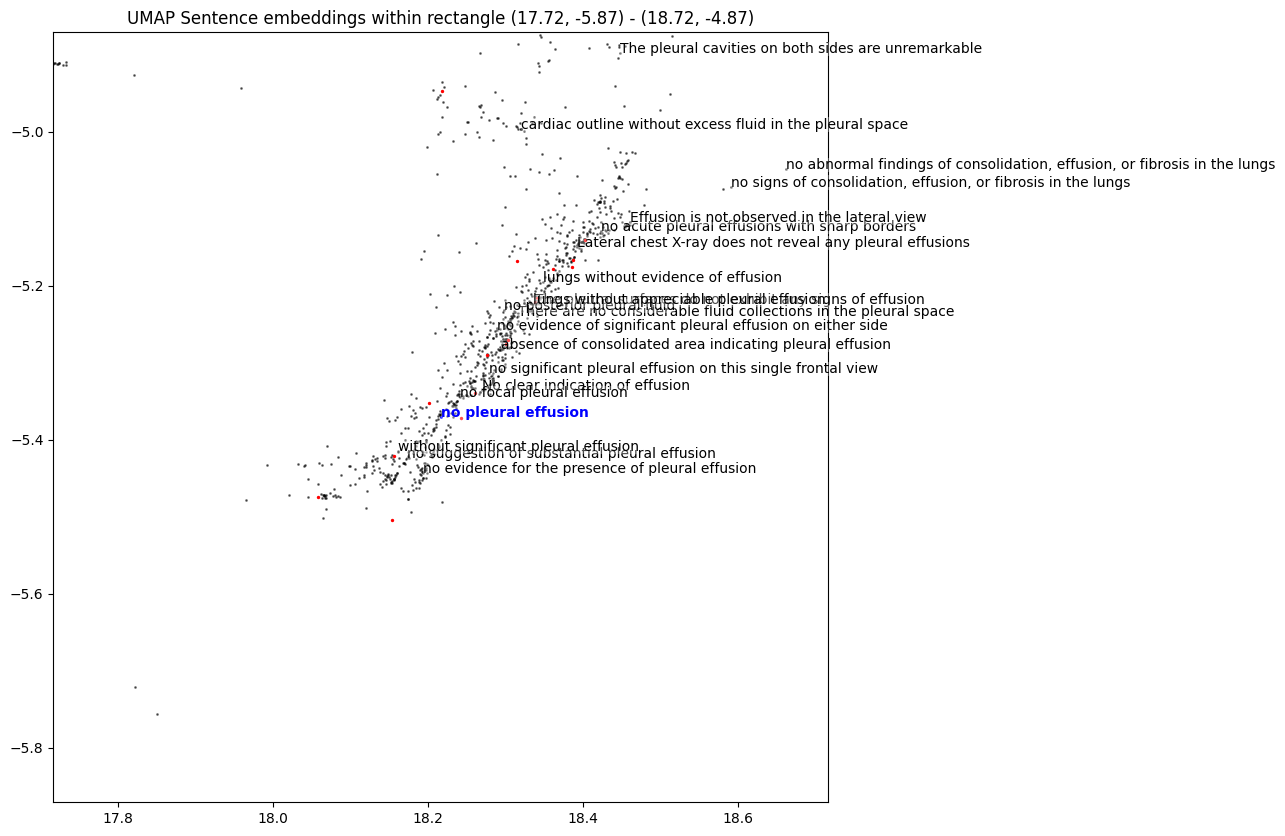

no pleural effusion
no focal pleural effusion
no posterior pleural fluid
No clear indication of effusion
lungs without evidence of effusion
without significant pleural effusion
lungs without appreciable pleural effusion
Effusion is not observed in the lateral view
no acute pleural effusions with sharp borders
no suggestion of substantial pleural effusion
no evidence for the presence of pleural effusion
The pleural cavities on both sides are unremarkable
absence of consolidated area indicating pleural effusion
Lateral chest X-ray does not reveal any pleural effusions
The pleural surfaces do not exhibit any signs of effusion
cardiac outline without excess fluid in the pleural space
no evidence of significant pleural effusion on either side
no significant pleural effusion on this single frontal view
no signs of consolidation, effusion, or fibrosis in the lungs
There are no considerable fluid collections in the pleural space
no abnormal findings of consolidation, effusion, or fibrosis in t

In [85]:
plot_rectangle_around_sentence(scv, 'no pleural effusion', 1, 1)

In [28]:
ccc_anatloc = get_cached_pickle_file("/home/pamessina/medvqa-workspace/cache/mimiccxr/closest_cluster_centers_(anatloc_sentences,anatloc_clusters)(hash=361,3925806207436708715).pkl")

In [29]:
ccc_anatloc.keys()

dict_keys(['sentence_idxs', 'closest_cluster_centers'])

In [30]:
kmrals = get_cached_pickle_file("/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_anatloc_sentences(hash=489,3726127490722775315).pkl")

In [31]:
kmrals.keys()

dict_keys(['refined_cluster_centers', 'refined_cluster_center_sentence_idxs', 'refined_cluster_center_sentences'])

In [32]:
kmrals['refined_cluster_centers'].shape

(326, 128)

In [88]:
scv_al = SentenceClusteringVisualizer(
    sentence_embeddings_filepath='/home/pamessina/medvqa-workspace/cache/mimiccxr/sentence_embeddings(hash=447,3362090641338804643).pkl',
    closest_cluster_centers_filepath='/home/pamessina/medvqa-workspace/cache/mimiccxr/closest_cluster_centers_(anatloc_sentences,anatloc_clusters)(hash=361,3925806207436708715).pkl',
    kmedoids_refinement_filepath='/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_anatloc_sentences(hash=489,3726127490722775315).pkl',
)

Fitting PCA to reduce dimensionality to 50
self.pca_embeddings.shape = (2297179, 50)
Fitting UMAP to reduce dimensionality to 2
embeddings.shape = (301747, 50)
UMAP(angular_rp_forest=True, metric='cosine', verbose=1)
Wed Sep  6 09:14:19 2023 Construct fuzzy simplicial set
Wed Sep  6 09:14:19 2023 Finding Nearest Neighbors
Wed Sep  6 09:14:19 2023 Building RP forest with 32 trees
Wed Sep  6 09:14:21 2023 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	Stopping threshold met -- exiting after 2 iterations
Wed Sep  6 09:14:37 2023 Finished Nearest Neighbor Search
Wed Sep  6 09:14:42 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Wed Sep  6 09:25:45 2023 Finished embedding
self.umap_embeddings.shape = (301747, 2)
cluster_centers.shape = (326, 128)
self.pca_cluster_centers.shape = (326, 50)
Wed Sep  6 09:26:04 2023 Worst tree score: 0.86805503
Wed Sep  6 09:26:04 2023 Mean tree score: 0.86970687
Wed Sep  6 09:26:04 2023 Best tree score: 0.87143866
Wed Sep  6 09:26:05 2023 Forward diversification reduced edges from 4526205 to 1283671
Wed Sep  6 09:26:05 2023 Reverse diversification reduced edges from 1283671 to 1283671
Wed Sep  6 09:26:05 2023 Degree pruning reduced edges from 1232432 to 1232432
Wed Sep  6 09:26:05 2023 Resorting data and graph based on tree order
Wed Sep  6 09:26:06 2023 Building and compiling search function


Epochs completed:   0%|            0/100 [00:00]

self.umap_cluster_centers.shape = (326, 2)


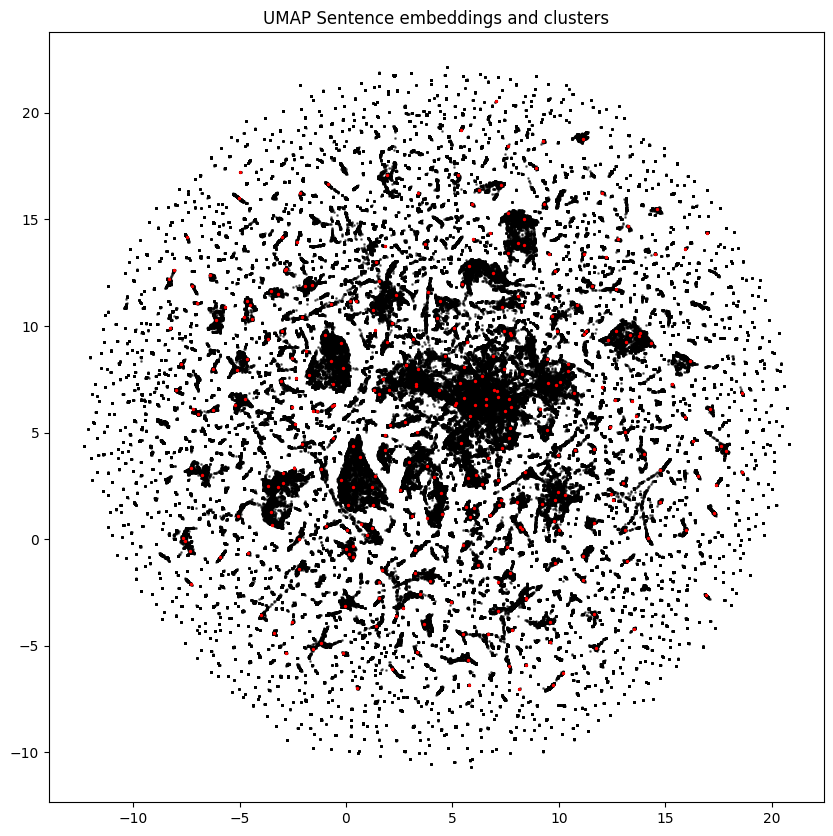

In [89]:
scv_al.plot_embeddings_and_clusters()

Epochs completed:   0%|            0/100 [00:00]

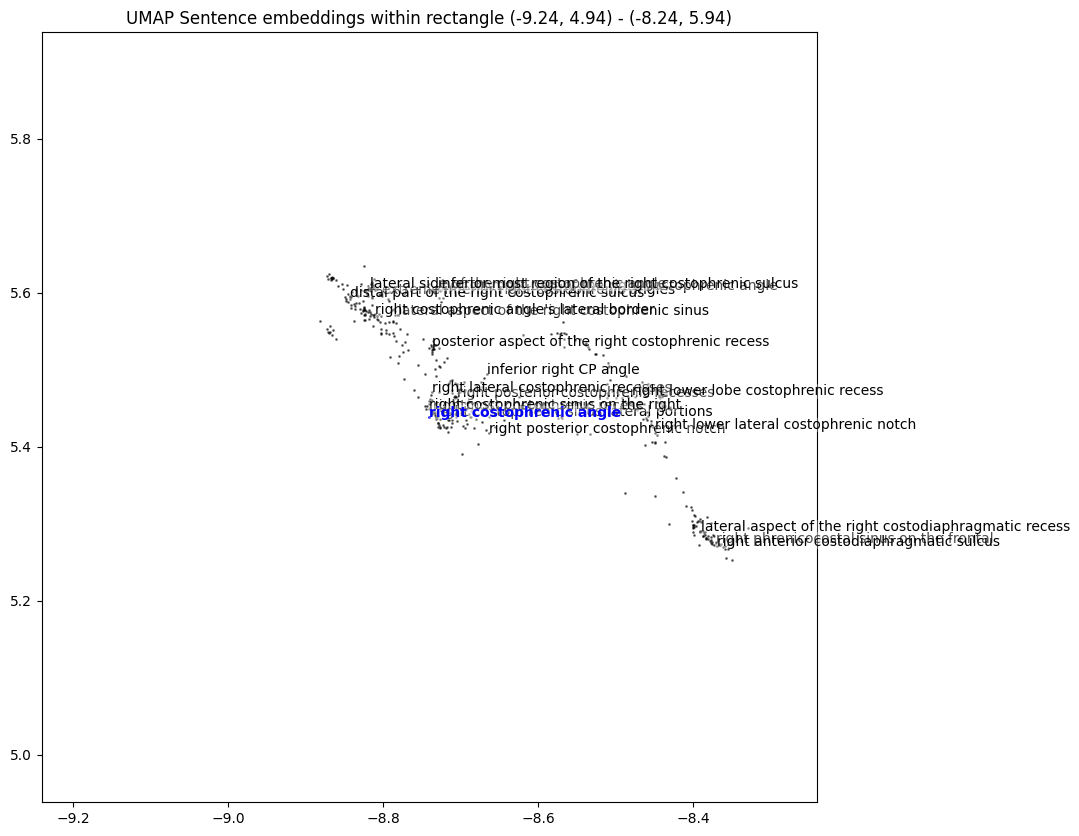

right costophrenic angle
inferior right CP angle
rightmost costophrenic recess
right posterior costophrenic notch
right lateral costophrenic recesses
right lower lobe costophrenic recess
right costophrenic sinus on the right
right posterior costophrenic recesses
right lower lateral costophrenic notch
right anterior costodiaphragmatic sulcus
right costophrenic angle's lateral border
right costophrenic sinus lateral portions
right phrenicocostal sinus on the frontal
extreme inferior right costophrenic angles
distal part of the right costophrenic sulcus
lateral side of the right costophrenic angle
lateral aspect of the right costophrenic sinus
bottommost part of the right costophrenic angle
posterior aspect of the right costophrenic recess
inferior-most region of the right costophrenic sulcus
lateral aspect of the right costodiaphragmatic recess


In [90]:
scv_al.plot_rectangle_around_sentence('right costophrenic angle', 1, 1)

Epochs completed:   0%|            0/100 [00:00]

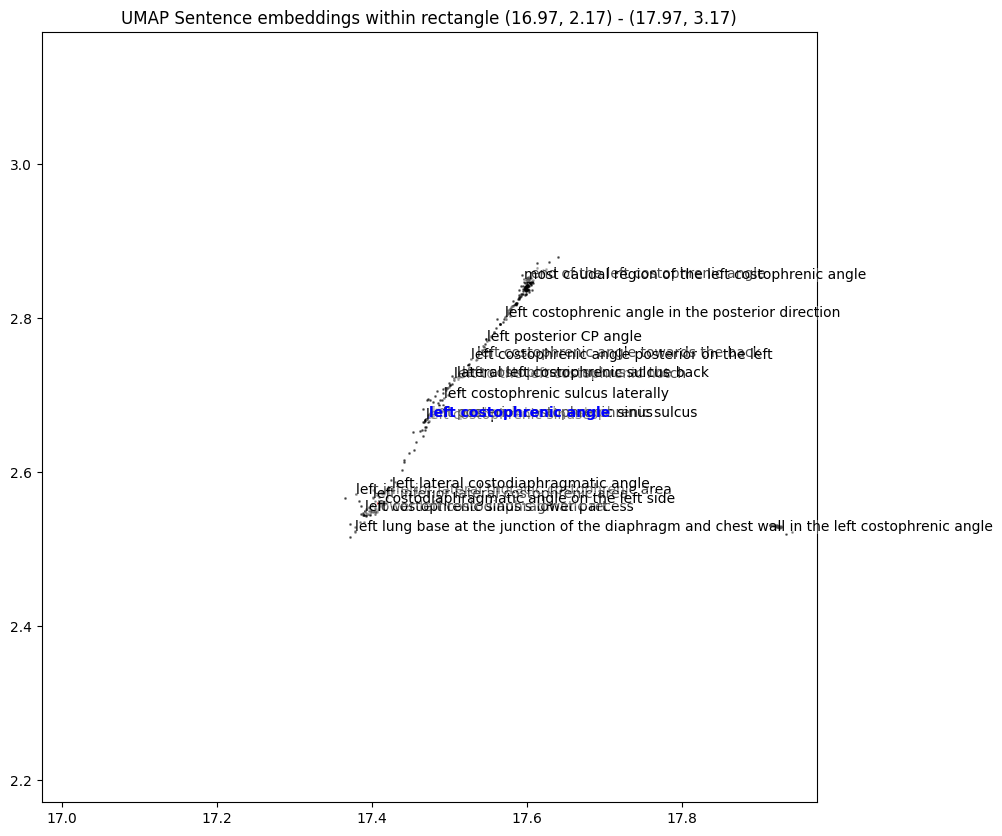

left costophrenic angle
left posterior CP angle
left costophrenic sinuses
lateral left costophrenic sulcus
left posterior costophrenic sinus
end of the left costophrenic angle
left costophrenic sulcus laterally
left to the left costophrenic notch
left costophrenic sinus's lower part
left costophrenic sulcus at the back
lower left costodiaphragmatic recess
left lateral costodiaphragmatic angle
left inferior lateral costophrenic area
left posterolateral costophrenic sulcus
left costophrenic angle towards the back
costodiaphragmatic angle on the left side
left costophrenic angle posterior on the left
left inferior lateral thoracic costophrenic area
most caudal region of the left costophrenic angle
left costophrenic angle in the posterior direction
left lung base at the junction of the diaphragm and chest wall in the left costophrenic angle


In [91]:
scv_al.plot_rectangle_around_sentence('left costophrenic angle', 1, 1)

Epochs completed:   0%|            0/100 [00:00]

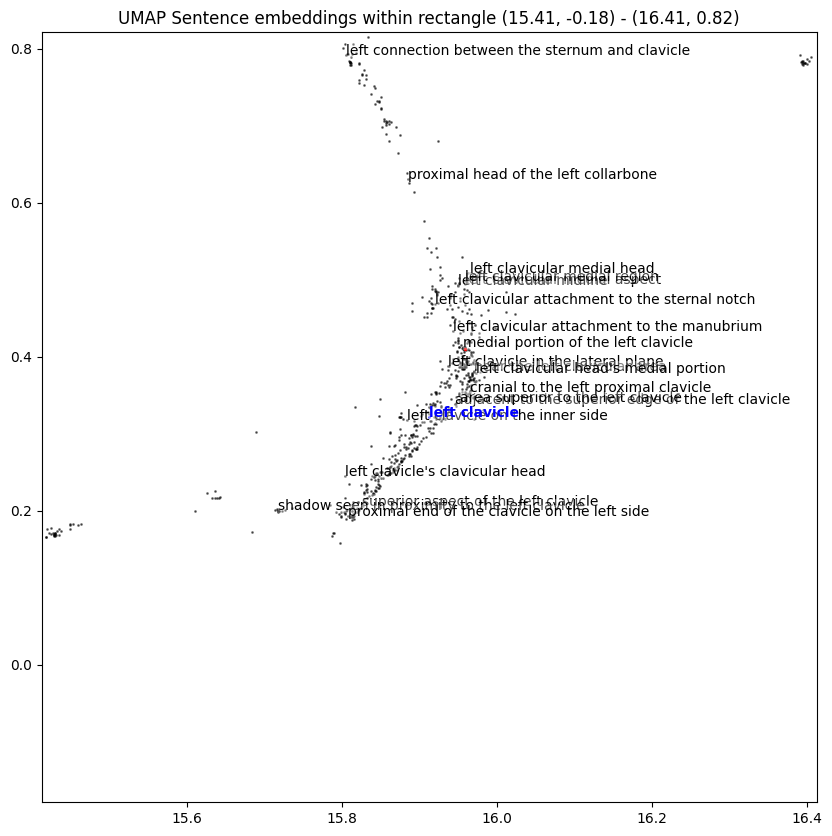

left clavicle
left clavicular midline
left clavicular medial head
left clavicular medial aspect
left clavicular medial region
near the left clavicular area
left clavicle on the inner side
left clavicle's clavicular head
area superior to the left clavicle
left clavicle in the lateral plane
medial portion of the left clavicle
proximal head of the left collarbone
superior aspect of the left clavicle
cranial to the left proximal clavicle
left clavicular head's medial portion
left clavicular attachment to the manubrium
proximal end of the clavicle on the left side
shadow seen in proximity to the left clavicle
left clavicular attachment to the sternal notch
left connection between the sternum and clavicle
adjacent to the superior edge of the left clavicle


In [93]:
scv_al.plot_rectangle_around_sentence('left clavicle', 1, 1)

Epochs completed:   0%|            0/100 [00:00]

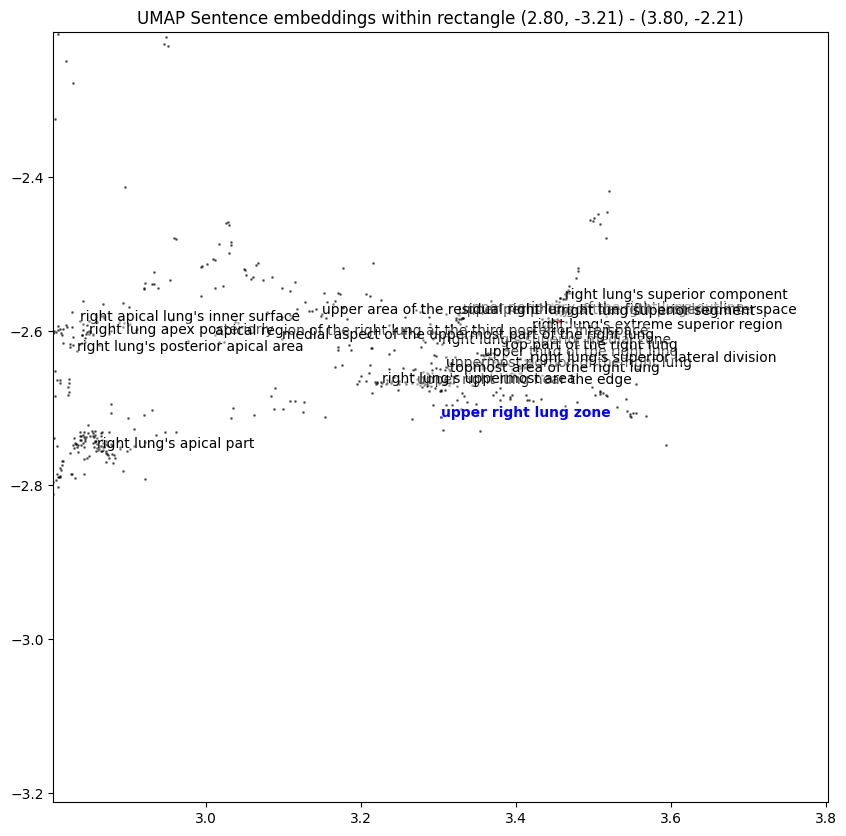

upper right lung zone
right lung's apical part
top part of the right lung
right lung apex posteriorly
right lung superior segment
right lung's uppermost area
upper third of the right lung
topmost area of the right lung
upper right lung near the edge
right lung's superior component
right apical lung's inner surface
right lung's superior medial zone
right lung's posterior apical area
uppermost portion of the right lung
right lung's extreme superior region
right lung's superior lateral division
upper periphery of the right lung border
upper periphery of the right lung outline
medial aspect of the uppermost part of the right lung
apical region of the right lung at the third posterior interspace
upper area of the residual right lung at the fifth posterior interspace


In [94]:
scv_al.plot_rectangle_around_sentence('upper right lung zone', 1, 1)

### Integrated Report Visualizer

In [95]:
from medvqa.scripts.mimiccxr.extract_labels_from_reports_with_fact_embedding import ClusteringBasedLabelVisualizer

In [10]:
from importlib import reload
import medvqa

In [13]:
reload(medvqa.scripts.mimiccxr.extract_labels_from_reports_with_fact_embedding)

<module 'medvqa.scripts.mimiccxr.extract_labels_from_reports_with_fact_embedding' from '/home/pamessina/medvqa/medvqa/scripts/mimiccxr/extract_labels_from_reports_with_fact_embedding.py'>

In [96]:
cblvis = ClusteringBasedLabelVisualizer(
    background_findings_and_impression_per_report_filepath="/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json",
    integrated_sentence_facts_filepath="/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_sentence_facts(58655550,49840052).jsonl",
    integrated_fact_metadata_filepath="/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_fact_metadata(578733,58628071).improved_comparison(6526297).jsonl",
    kmedoids_refinement_obs_sentences_filepath="/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_obs_sentences(hash=488,1416617623155579779).pkl",
    kmedoids_refinement_anatloc_sentences_filepath="/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_anatloc_sentences(hash=489,3726127490722775315).pkl",
    cluster_based_labels_per_fact_filepath="/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_fact(hash=604,3497134141690802123).pkl",
    cluster_based_labels_per_report_filepath="/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_report(hash=551,546747151287842333).pkl",
)

Loading /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_sentence_facts(58655550,49840052).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_fact_metadata(578733,58628071).improved_comparison(6526297).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_fact(hash=604,3497134141690802123).pkl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_obs_sentences(hash=488,1416617623155579779).pkl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_anatloc_sentences(hash=489,3726127490722775315).pkl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_report(hash=551,546747151287842333).pkl...


In [97]:
# cblvis.display_report(225754)
cblvis.display_report(129043)

i = 129043
Report path:
/mnt/data/mimic-cxr/files/p15/p15378103/s55048387.txt

Original report:
                                 FINAL REPORT
 INDICATION:  ___-year-old male with fatigue and hypercalcemia.  Question acute
 process.
 
 COMPARISON:  CT dated ___ and radiograph dated ___.
 
 FINDINGS:  Frontal and lateral views of the chest demonstrate a left pectoral
 dual-lead pacer/AICD with leads terminating in the right atrium and right
 ventricle.  The heart is normal in size.  There is mild thoracic aortic
 unfolding.  Atherosclerotic calcifications are seen in the arch.  
 Suspected right middle lobe mass is present since at least ___ and
 previously evaluated on CT.  Right basilar fibrosis is also better
 demonstrated on prior CT.   Aerated upper lungs are clear.  There is no
 pneumothorax, vascular congestion, or pleural effusion.
 
 IMPRESSION:
 1.  No acute cardiopulmonary process.
 2.  Probable right middle lobe mass, better assessed on prior CT.\
 3.  Right bibasilar pulmona